In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
sns.set_theme()
sns.set_palette('bright')
sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4
# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
# sns.set_context("notebook")


In [3]:
import sys

sys.executable


'/home/pia/Documents/KD_Lib/kd_venv/bin/python3'

In [4]:
vanilla_df = pd.read_csv("Experiments/super_convergence0/vanilla.csv")
dml_df = pd.read_csv("Experiments/super_convergence1/dml.csv")
dmle_df = pd.read_csv("Experiments/super_convergence1/dml_e.csv")
tfkd_df = pd.read_csv("Experiments/super_convergence0/tfkd.csv")
ce_df = pd.read_csv("Experiments/calibration2/ce.csv")
kld_df = pd.read_csv("Experiments/calibration2/kld.csv")


In [5]:
def preprocess_df(df):
    df = df.iloc[2:]
    df = df.apply(pd.to_numeric)
    df = df.reset_index(drop=True)
    return df


In [6]:
vanilla_df


,Unnamed: 0,Loss/Train teacher,Loss/Calibration teacher,Accuracy/Train teacher,Accuracy/Validation teacher,Optimizer/lr teacher,Loss/Train student,Accuracy/Train student,Accuracy/Validation student,Loss/Cross-entropy student,...,Accuracy/Validation teacher.3,Optimizer/lr teacher.3,Loss/Train student.3,Accuracy/Train student.3,Accuracy/Validation student.3,Loss/Cross-entropy student.3,Loss/Divergence student.3,Loss/Entropy student.3,Loss/Calibration student.3,Optimizer/lr student.3
0,NaN,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,max,max,max,max,max,max,max,max,max,max
1,step,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,139.25950927734374,7.306301340577192e-05,0.12011333554983139,0.13670000284910203,0.00031786024919711053,71.14435119628907,0.1315266653895378,0.16162000000476837,2.315557670593262,...,0.16660000383853912,0.00031786024919711053,72.9160385131836,0.1779666692018509,0.2635999917984009,2.3723323345184326,0.09939777851104736,2.2248449325561523,0.13095952570438385,0.00031786024919711053
3,1,127.31270446777344,6.201059732120484e-05,0.20939333736896515,0.257379999756813,0.0006598651525564492,65.63865509033204,0.1848633348941803,0.2233000010251999,2.1320488452911377,...,0.287200003862381,0.0006598651525564492,69.68650817871094,0.3007666766643524,0.28949999809265137,2.264620065689087,0.09763450175523758,2.2217679023742676,0.12292095273733139,0.0006598651525564492
4,2,103.33630676269532,0.0001126679460867308,0.3532600045204163,0.42450000047683717,0.0011924240970984101,58.782710266113284,0.3118500024080276,0.3780600011348724,1.905040407180786,...,0.4514999985694885,0.0011924240970984101,63.86418533325195,0.3642333447933197,0.4302999973297119,2.0718252658843994,0.09306240826845169,2.1532955169677734,0.1566987931728363,0.0011924240970984101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,95,8.339633560180664,1.8450682182447055e-05,0.9505366683006287,0.896399998664856,2.4144315830199048e-05,7.06178560256958,0.915636670589447,0.8890000104904174,0.23247744739055634,...,0.9014000296592712,2.4144315830199048e-05,8.037074089050293,0.9228833317756653,0.8970000147819519,0.26404693722724915,0.008396240882575512,0.27918314933776855,0.022044993937015533,2.4144315830199048e-05
98,96,8.299591636657714,1.8310298037249596e-05,0.9509666681289672,0.8966399908065796,1.3561035302700475e-05,7.065157127380371,0.9153266549110413,0.8894800066947937,0.23258951008319856,...,0.9014999866485596,1.3561035302700475e-05,8.077790260314941,0.9230166673660278,0.8981000185012817,0.26541054248809814,0.0084128612652421,0.2791169583797455,0.021373972296714783,1.3561035302700475e-05
99,97,8.314682579040527,1.85605269507505e-05,0.9509000062942505,0.8966799974441528,6.0071106418035924e-06,7.054654693603515,0.915779995918274,0.8889799952507019,0.2322480708360672,...,0.9023000001907349,6.0071106418035924e-06,8.045086860656738,0.9231333136558533,0.8980000019073486,0.26433104276657104,0.008383771404623985,0.2790659964084625,0.021925464272499084,6.0071106418035924e-06
100,98,8.290816497802734,1.8179425023845396e-05,0.9508966684341431,0.8961199998855591,1.4917442285877769e-06,7.054759883880616,0.9153966665267944,0.8891200065612793,0.23223913013935088,...,0.901199996471405,1.4917442285877769e-06,8.026070594787598,0.9228500127792358,0.8980000019073486,0.2636964023113251,0.008373785763978958,0.27916523814201355,0.021893387660384178,1.4917442285877769e-06


In [7]:
vanilla_df = preprocess_df(vanilla_df)
dml_df = preprocess_df(dml_df)
dmle_df = preprocess_df(dmle_df)
tfkd_df = preprocess_df(tfkd_df)
ce_df = preprocess_df(ce_df)
kld_df = preprocess_df(kld_df)


In [8]:
vanilla_df


,Unnamed: 0,Loss/Train teacher,Loss/Calibration teacher,Accuracy/Train teacher,Accuracy/Validation teacher,Optimizer/lr teacher,Loss/Train student,Accuracy/Train student,Accuracy/Validation student,Loss/Cross-entropy student,...,Accuracy/Validation teacher.3,Optimizer/lr teacher.3,Loss/Train student.3,Accuracy/Train student.3,Accuracy/Validation student.3,Loss/Cross-entropy student.3,Loss/Divergence student.3,Loss/Entropy student.3,Loss/Calibration student.3,Optimizer/lr student.3
0,0,139.259509,0.000073,0.120113,0.13670,3.178602e-04,71.144351,0.131527,0.16162,2.315558,...,0.1666,3.178602e-04,72.916039,0.177967,0.2636,2.372332,0.099398,2.224845,0.130960,3.178602e-04
1,1,127.312704,0.000062,0.209393,0.25738,6.598652e-04,65.638655,0.184863,0.22330,2.132049,...,0.2872,6.598652e-04,69.686508,0.300767,0.2895,2.264620,0.097635,2.221768,0.122921,6.598652e-04
2,2,103.336307,0.000113,0.353260,0.42450,1.192424e-03,58.782710,0.311850,0.37806,1.905040,...,0.4515,1.192424e-03,63.864185,0.364233,0.4303,2.071825,0.093062,2.153296,0.156699,1.192424e-03
3,3,74.743768,0.000151,0.537400,0.60408,1.863231e-03,48.753840,0.464337,0.52332,1.575088,...,0.6336,1.863231e-03,53.509052,0.555967,0.6149,1.728381,0.085485,1.983391,0.246263,1.863231e-03
4,4,53.361240,0.000120,0.680707,0.70694,2.606401e-03,37.497710,0.589357,0.62030,1.207379,...,0.7315,2.606401e-03,40.888325,0.655633,0.6811,1.314511,0.071534,1.689467,0.213065,2.606401e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,8.339634,0.000018,0.950537,0.89640,2.414432e-05,7.061786,0.915637,0.88900,0.232477,...,0.9014,2.414432e-05,8.037074,0.922883,0.8970,0.264047,0.008396,0.279183,0.022045,2.414432e-05
96,96,8.299592,0.000018,0.950967,0.89664,1.356104e-05,7.065157,0.915327,0.88948,0.232590,...,0.9015,1.356104e-05,8.077790,0.923017,0.8981,0.265411,0.008413,0.279117,0.021374,1.356104e-05
97,97,8.314683,0.000019,0.950900,0.89668,6.007111e-06,7.054655,0.915780,0.88898,0.232248,...,0.9023,6.007111e-06,8.045087,0.923133,0.8980,0.264331,0.008384,0.279066,0.021925,6.007111e-06
98,98,8.290816,0.000018,0.950897,0.89612,1.491744e-06,7.054760,0.915397,0.88912,0.232239,...,0.9012,1.491744e-06,8.026071,0.922850,0.8980,0.263696,0.008374,0.279165,0.021893,1.491744e-06


In [9]:
def create_plotting_df(df, col_list):
    new_df = pd.DataFrame()

    for col_name in col_list:
        means = np.array(df[col_name])
        sigmas = np.array(df[str(col_name + ".1")])

        lower_bound = means - sigmas
        upper_bound = means + sigmas

        new_df[col_name] = means
        new_df[str(col_name + "_std")] = sigmas
        new_df[str(col_name + "_lower")] = lower_bound
        new_df[str(col_name + "_upper")] = upper_bound

    return new_df


def plot_df(df, col_list, label_list, ax=None):
    plotting_df = create_plotting_df(df, col_list)

    for idx, col_name in enumerate(col_list):
        ax = sns.lineplot(data=plotting_df, x=plotting_df.index,
                          y=plotting_df[col_name], ax=ax, label=label_list[idx])
        plt.fill_between(plotting_df.index, plotting_df[str(
            col_name + "_lower")], plotting_df[str(col_name + "_upper")], alpha=.2)

    return ax


In [10]:
keep_vanilla = ["Accuracy/Validation teacher", "Accuracy/Validation student"]
keep_dml = ["Accuracy/Validation student0",
            "Accuracy/Validation student1", "Accuracy/Validation student2"]

labels_vanilla = ["KD Teacher", "KD Student"]
labels_dml = ["Student 1", "Student 2", "Student 3"]


In [11]:
acc_tfkd = create_plotting_df(tfkd_df, [keep_vanilla[1]])
acc_tfkd


,Accuracy/Validation student,Accuracy/Validation student_std,Accuracy/Validation student_lower,Accuracy/Validation student_upper
0,0.13992,0.018741,0.121179,0.158661
1,0.24674,0.075988,0.170752,0.322728
2,0.35770,0.059758,0.297942,0.417458
3,0.50910,0.090803,0.418297,0.599903
4,0.59546,0.114577,0.480883,0.710037
...,...,...,...,...
95,0.88262,0.007356,0.875264,0.889976
96,0.88248,0.007378,0.875102,0.889858
97,0.88218,0.007540,0.874640,0.889720
98,0.88242,0.007389,0.875031,0.889809


# Plotting with seaborn
## Validation accuracy

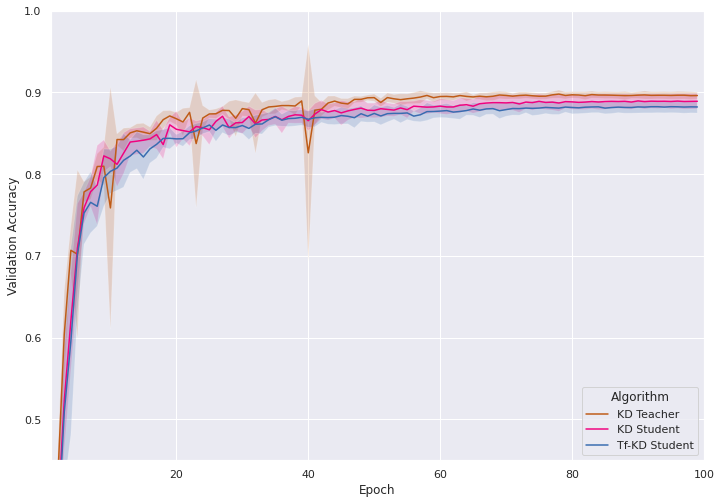

In [12]:
sns.set_palette('Accent_r')

ax = plot_df(vanilla_df, keep_vanilla, labels_vanilla)
ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax)
# ax = plot_df(dml_df, keep_dml, ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
ax.legend(title='Algorithm', loc='lower right')  # bbox_to_anchor=[1.2,1.0]


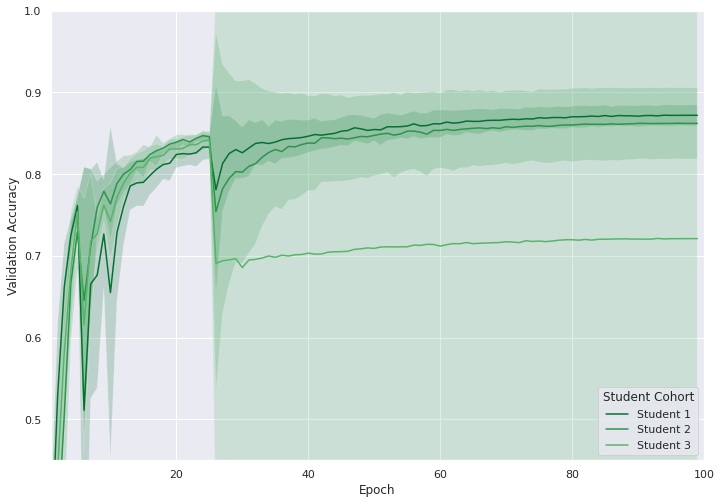

In [13]:
sns.set_palette('Greens_r')
ax = plot_df(dml_df, keep_dml, labels_dml)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')


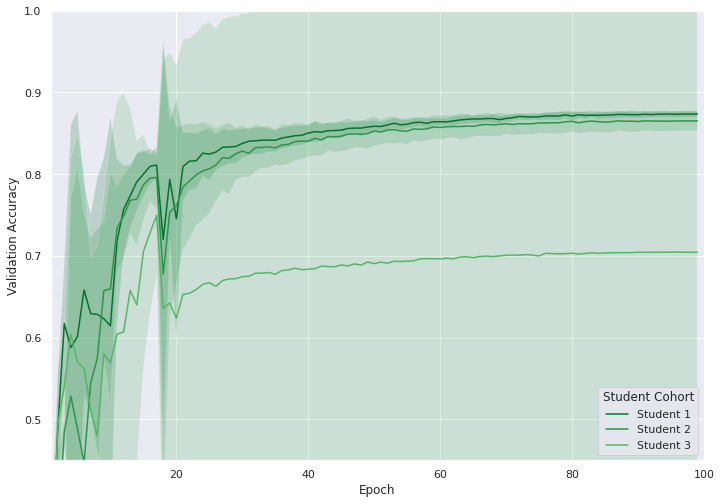

In [14]:
ax = plot_df(dmle_df, keep_dml, labels_dml)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')

ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')


## Loss functions

In [15]:
loss_student = ["Loss/Cross-entropy student", "Loss/Divergence student",
                "Loss/Entropy student", "Loss/Calibration student", "Loss/Calibration teacher"]
loss_dml = ["Loss/Cross-entropy student0", "Loss/Divergence student0", "Loss/Entropy student0", "Loss/Calibration student0",
            "Loss/Cross-entropy student1", "Loss/Divergence student1", "Loss/Entropy student1", "Loss/Calibration student1",
            "Loss/Cross-entropy student2", "Loss/Divergence student2", "Loss/Entropy student2", "Loss/Calibration student2"]

loss_labels = ["Cross-entropy", "Divergence",
               "Entropy", "Calibration", "Calibration Teacher"]
loss_labels_dml = ["Cross-entropy 1", "Divergence 1", "Entropy 1", "Calibration 1",
                   "Cross-entropy 2", "Divergence 2", "Entropy 2", "Calibration 2",
                   "Cross-entropy 3", "Divergence 3", "Entropy 3", "Calibration 3"]


(1.0, 100.0)

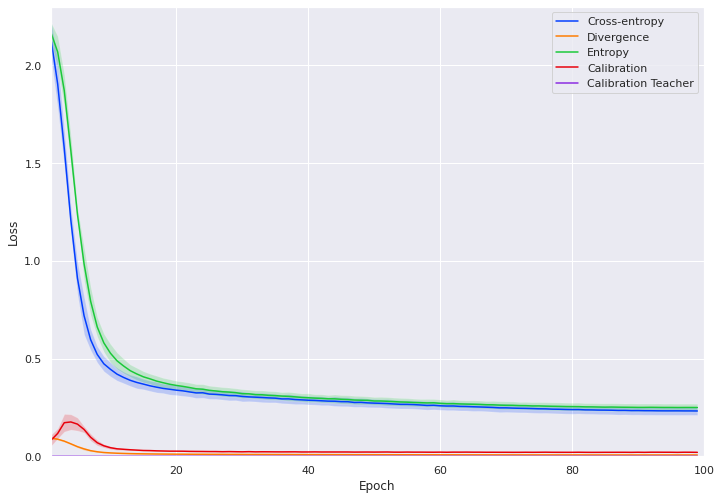

In [18]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

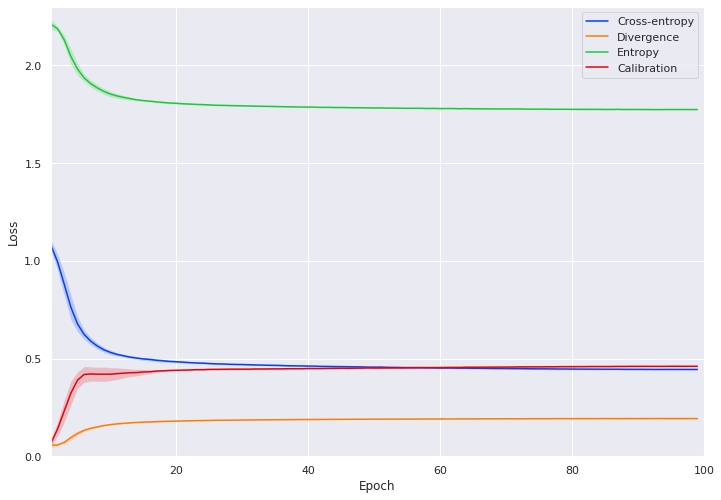

In [17]:
ax = plot_df(tfkd_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


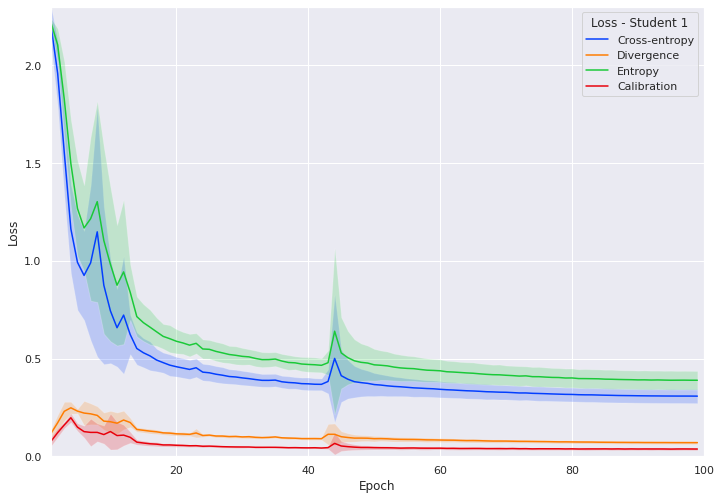

In [18]:
ax = plot_df(dml_df, loss_dml[:4], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 1', loc='upper right')


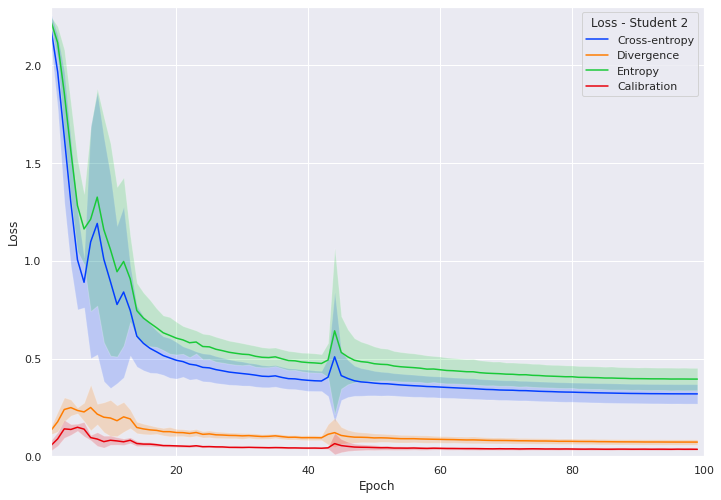

In [19]:
ax = plot_df(dml_df, loss_dml[4:8], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 2', loc='upper right')


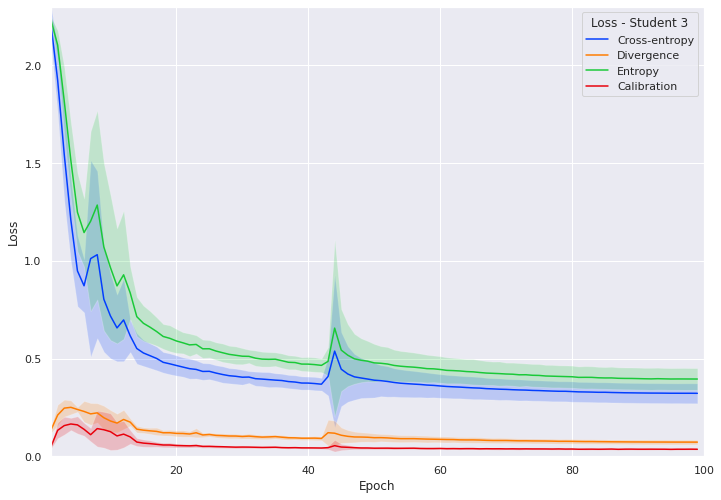

In [20]:
ax = plot_df(dml_df, loss_dml[8:], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 3', loc='upper right')


## Direct comparisons

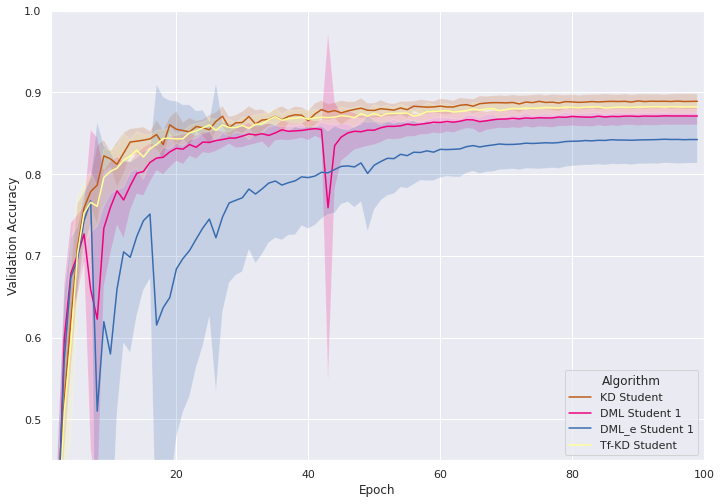

In [21]:
sns.set_palette("Accent_r")

ax = plot_df(vanilla_df, [keep_vanilla[1]], [labels_vanilla[1]])
ax = plot_df(dml_df, [keep_dml[0]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [keep_dml[0]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
ax.legend(title='Algorithm', loc='lower right')  # bbox_to_anchor=[1.2,1.0]


(1.0, 100.0)

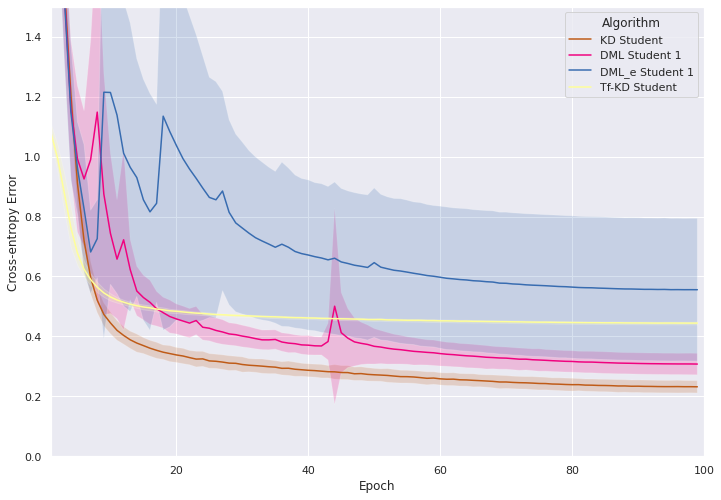

In [22]:
ax = plot_df(vanilla_df, [loss_student[0]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[0]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[0]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[0]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Cross-entropy Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 1.5)
ax.set_xlim(1, 100)


(1.0, 100.0)

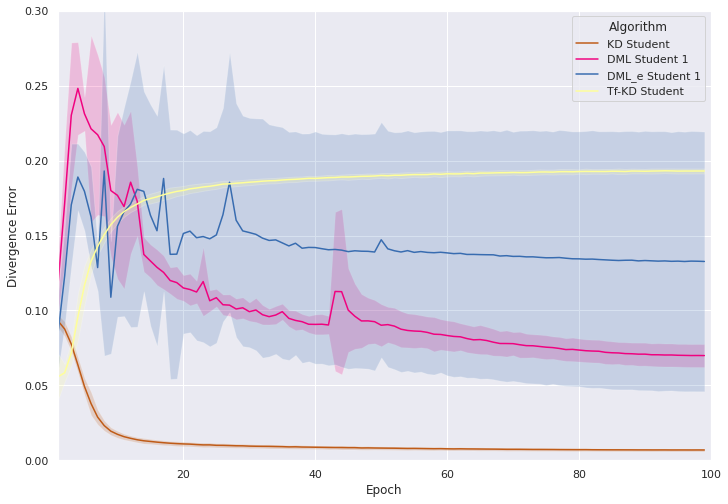

In [23]:
ax = plot_df(vanilla_df, [loss_student[1]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[1]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[1]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[1]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Divergence Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 0.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

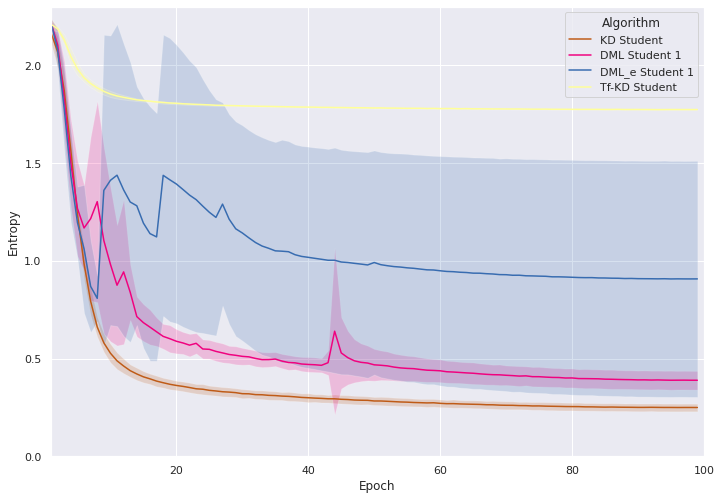

In [24]:
ax = plot_df(vanilla_df, [loss_student[2]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[2]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[2]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[2]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Entropy')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

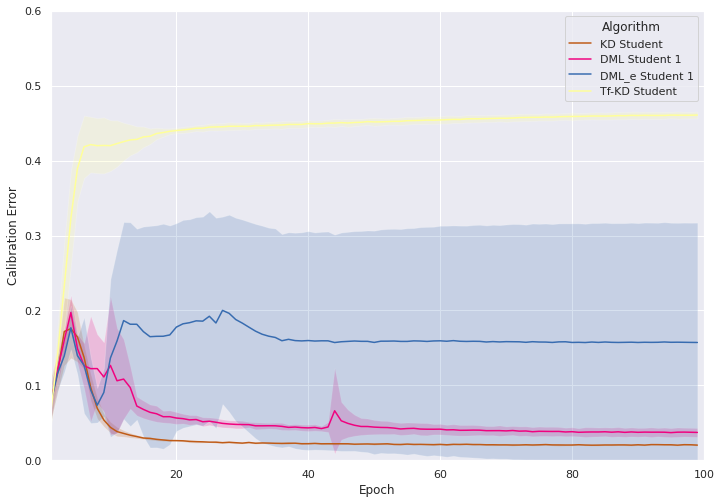

In [25]:
ax = plot_df(vanilla_df, [loss_student[3]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[3]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[3]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[3]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Calibration Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 0.6)
ax.set_xlim(1, 100)


### Miscellaneous

(-1.0, 100.0)

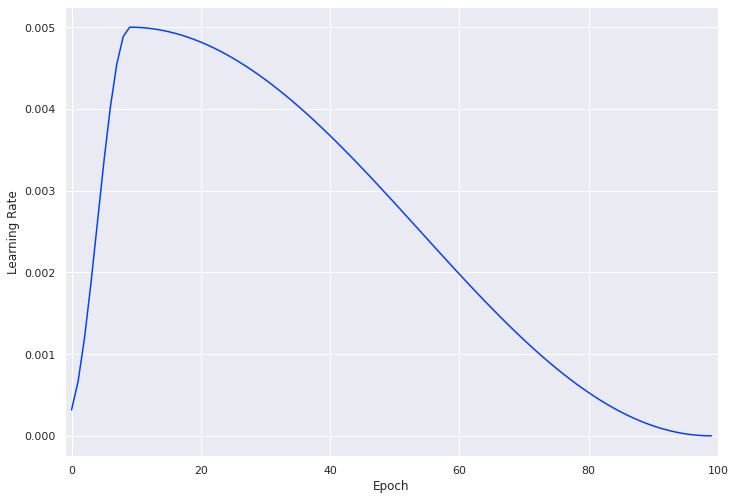

In [78]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, ["Optimizer/lr student"], [""])
ax.set(xlabel='Epoch', ylabel='Learning Rate')
ax.set_xlim(-1, 100)


(1.0, 100.0)

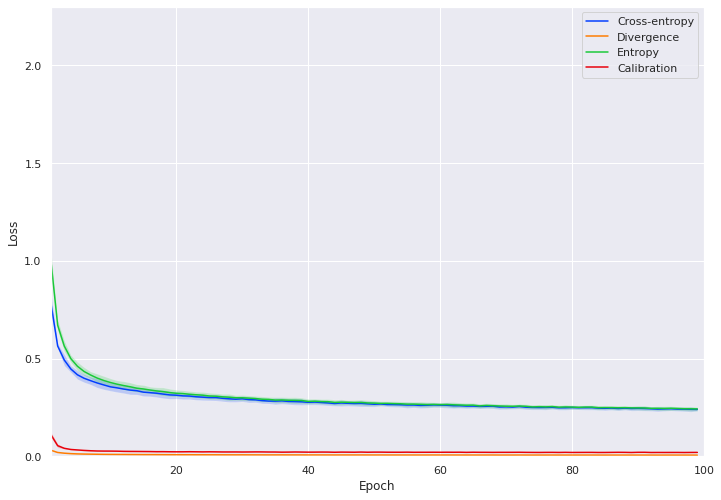

In [97]:
ax = plot_df(ce_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

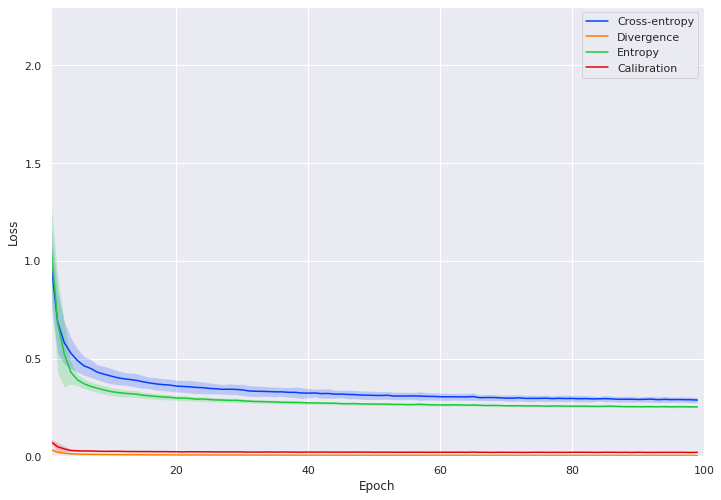

In [98]:
ax = plot_df(kld_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


## Previous attempts

In [16]:
summary = pd.DataFrame()
summary["KD teacher"] = vanilla_df[keep_vanilla[0]]
summary["KD student"] = vanilla_df[keep_vanilla[1]]

summary["DML student0"] = dml_df[keep_dml[0]]
summary["DML student1"] = dml_df[keep_dml[1]]
summary["DML student2"] = dml_df[keep_dml[2]]

summary["DMLe student0"] = dmle_df[keep_dml[0]]
summary["DMLe student1"] = dmle_df[keep_dml[1]]
summary["DMLe student2"] = dmle_df[keep_dml[2]]

summary["Tf-KD student"] = tfkd_df[keep_vanilla[1]]


In [17]:
summary


,KD teacher,KD student,DML student0,DML student1,DML student2,DMLe student0,DMLe student1,DMLe student2,Tf-KD student
0,0.13670,0.16162,0.12734,0.14678,0.12460,0.12686,0.14688,0.12528,0.13992
1,0.25738,0.22330,0.20732,0.23140,0.24220,0.20368,0.23178,0.23884,0.24674
2,0.42450,0.37806,0.35434,0.34080,0.41990,0.37500,0.34666,0.41170,0.35770
3,0.60408,0.52332,0.59886,0.48376,0.51460,0.57350,0.47168,0.51822,0.50910
4,0.70694,0.62030,0.67874,0.60196,0.65848,0.67390,0.62320,0.65386,0.59546
...,...,...,...,...,...,...,...,...,...
95,0.89640,0.88900,0.87130,0.86752,0.86592,0.84250,0.68936,0.69612,0.88262
96,0.89664,0.88948,0.87128,0.86748,0.86596,0.84254,0.68940,0.69622,0.88248
97,0.89668,0.88898,0.87130,0.86748,0.86612,0.84224,0.68958,0.69618,0.88218
98,0.89612,0.88912,0.87124,0.86766,0.86608,0.84246,0.68964,0.69616,0.88242


In [16]:
# All the preprocessing is done above now

# summary = summary[summary['KD student'].notna()]
# summary = summary.iloc[1:]
# summary = summary.apply(pd.to_numeric)
# summary = summary.reset_index(drop=True)


In [19]:
# !pip install seaborn


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Validation Accuracy')]

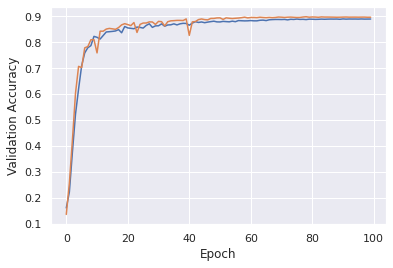

In [31]:
ax = sns.lineplot(data=summary, x=summary.index, y='KD student')
ax = sns.lineplot(data=summary, x=summary.index, y='KD teacher', ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')


## Goal: recreate pandas plot with seaborn

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

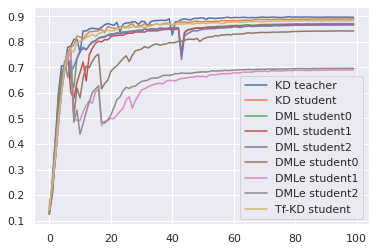

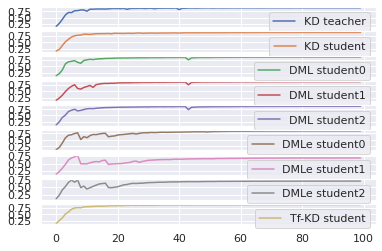

In [23]:
summary.plot.line(subplots=False)
summary.plot.line(subplots=True)


In [25]:
sns_summary = summary.copy()
sns_summary["step"] = range(100)
sns_summary = pd.melt(sns_summary, id_vars='step')
sns_summary.head()


,step,variable,value
0,0,KD teacher,0.13670
1,1,KD teacher,0.25738
2,2,KD teacher,0.42450
3,3,KD teacher,0.60408
4,4,KD teacher,0.70694


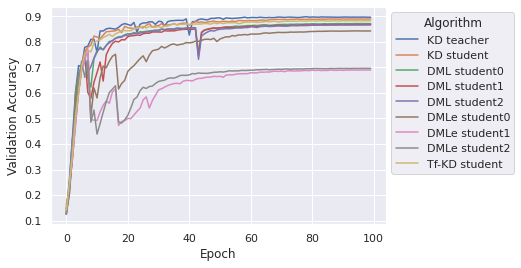

In [30]:
ax = sns.lineplot(data=sns_summary, x='step', y='value', hue='variable')
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.legend(title='Algorithm', bbox_to_anchor=[1.0, 1.0])


### Success!

# What about statistical significance?

In [26]:
from scipy import stats


In [32]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [34]:
t_stat, p_value


(-3.086974532565159, 0.03668198940044108)

In [35]:
# DML and DML_e
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.80, 0.83, 0.84, 0.85, 0.89])


In [36]:
t_stat, p_value


(2.1864326664404867, 0.09406601105916962)

In [37]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.88, 0.88, 0.88, 0.89], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [38]:
t_stat, p_value


(-4.0, 0.01613008990009254)